#  1 Implement the K-means algorithm

## OBS KOLLA N_INIT 

In [144]:
import numpy as np
import pandas as ps
from copy import deepcopy
from random import randint
from matplotlib import pyplot
from sklearn.datasets import make_blobs
import warnings
from skimage import io
import numpy as np
import numpy.matlib
import random
import scipy.misc
import os
import imageio
warnings.filterwarnings('ignore')

In [162]:
# birb code
def init_centroids(X,K):
    c = random.sample(list(X),K)
    cc = np.stack(c, axis=0 )
    return c,cc

def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = (np.ones((np.size(X,0),1))*y)
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

def run_kMean(X,initial_centroids,max_iters):
    old_clusters = np.zeros(len(initial_centroids))
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    error = 1
    for i in range(max_iters):
        old_clusters = deepcopy(centroids)
        if error != 0:
            idx = closest_centroids(X,centroids)
            centroids = compute_centroids(X,idx,K)  
            error = dist(centroids, old_clusters) # check for convergence
        else:
            break  

    return centroids,idx

def dist(a, b):
    #a = np.array(a)
    #b = np.array(b)
    return np.linalg.norm(a - b)

In [163]:
def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    pyplot.title('K-means clusters')
    pyplot.xlabel('')
    pyplot.ylabel('')
    pyplot.show()

In [164]:
def generate_fake_data(f_centers):
    x, y = make_blobs(n_samples=5000, centers=f_centers, n_features=2, random_state=195)
    xx = deepcopy(x)
    yy = deepcopy(y)
    return f_centers, x, xx, yy

def plot_reg_data(x):
    %matplotlib inline
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.title('Initial blobs')
    pyplot.xlabel('')
    pyplot.ylabel('')
    pyplot.show()  
    
def gen_rand_cluster(nub_cluster):
    n_features = 2
    c_pos = generate_random_clusters(n_features, nub_cluster) 
    c_pos = np.array(c_pos).T
    return c_pos

def get_centroids(x, cent_pos):
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.scatter(cent_pos[:, 0], cent_pos[:, 1], marker='*', s=300, c='orange')
    pyplot.title('Initial centroids')
    pyplot.xlabel('')
    pyplot.ylabel('')
    pyplot.show()

In [165]:
f_centers = 4
f_cent, x, xx, yy = generate_fake_data(f_centers)
print(f_cent)

4


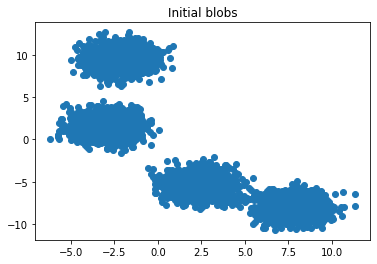

In [166]:
plot_reg_data(x)

In [167]:
K=4
cc_pos,cc_display=init_centroids(x,K)
cc_pos

[array([ 7.63360513, -8.25040665]),
 array([-3.89776294, 10.7429625 ]),
 array([ 2.45573652, -5.44109095]),
 array([ 1.31435803, -5.7194875 ])]

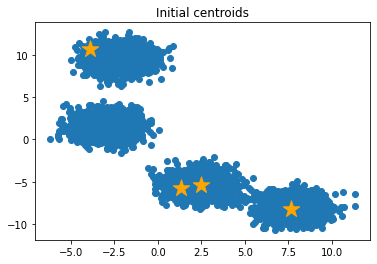

In [168]:
get_centroids(x, cc_display)

In [169]:
n_init=50
cent, idx = run_kMean(x, cc_pos, n_init)

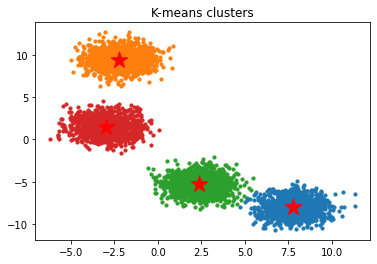

In [170]:
plot_in_col(x, f_cent, idx, cent)

In [171]:
# ELBOW 

In [172]:
'''
Generating new clusters and calculating distance 
'''
nc_lst = [] # centroid pos
p_lst = [] # cluster pos
centroids_lst = [] # number of centroids per cluster
k=5
for i in range(1,k):
    f_cent, x, xx, yy = generate_fake_data(i)
    cc_pos,cc_display=init_centroids(x,K)
    cent, idx = run_kMean(x, cc_pos, n_init)
    # appending positions to list
    nc_lst.append(cent)
    p_lst.append(idx)
    centroids_lst.append(x)
    


In [173]:
def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = np.sqrt(squared_distance)
    return dist

In [174]:
sum_lst = []
for i in range(len(nc_lst)):
    # distance betwwn centroid and repective cluster
    test_sse_1 = dist_2d(nc_lst[i], p_lst[i]) 
    # appending each distance to list
    sum_lst.append(test_sse_1)

In [175]:
print(sum_lst)

[array([12.73984855, 19.08783326]), array([ 8.50563012, 15.15192641]), array([ 9.15089178, 12.88838584]), array([ 9.51623676, 14.38626811])]


In [176]:
cc_sort = np.sort(nc_lst)
cent_sort = np.sort(centroids_lst)

In [177]:
'''
getting lowes value
'''
#for c in range(len(sum_lst)):
sum_sort = np.sort(np.array(sum_lst), axis=1)
sum_sort

array([[12.73984855, 19.08783326],
       [ 8.50563012, 15.15192641],
       [ 9.15089178, 12.88838584],
       [ 9.51623676, 14.38626811]])

In [178]:
# make one-dimn array and sort (decending)
x_test = np.concatenate(sum_sort)
x_test = np.sort(x_test)[::-1]
print(x_test)

[19.08783326 15.15192641 14.38626811 12.88838584 12.73984855  9.51623676
  9.15089178  8.50563012]


Text(0, 0.5, 'SSE')

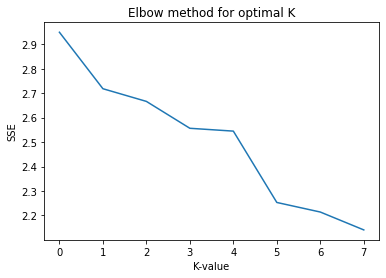

In [179]:
pyplot.plot(np.log(x_test))
pyplot.title('Elbow method for optimal K')
pyplot.xlabel('K-value')
pyplot.ylabel('SSE')

Block below is for validating our elbow method against sklearn's built in

Text(0, 0.5, 'SSE')

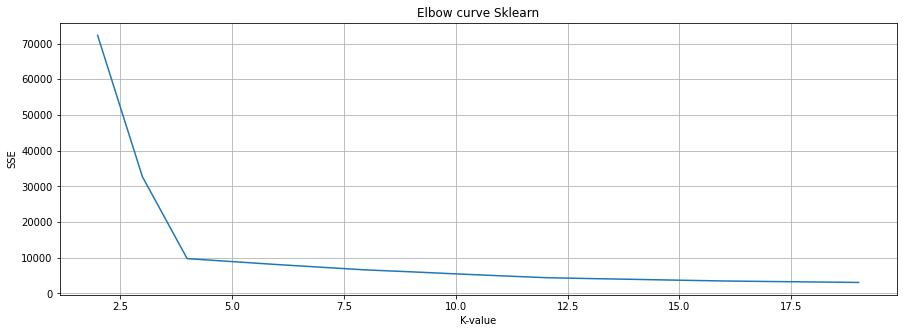

In [180]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = x 
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve Sklearn')
pyplot.xlabel('K-value')
pyplot.ylabel('SSE')

# 2 Apply the K-means algorithm to compress an image

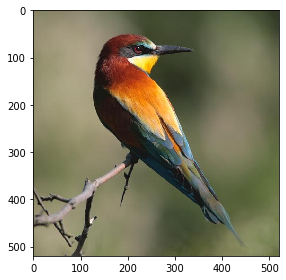

In [181]:
image = io.imread('img_test.png')
io.imshow(image)
io.show()

In [182]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [183]:
K = 16 #number of clusters 16 start 
max_iters = 50 #number of times the k-mean should run

In [184]:
initial_centroids, initial_centroids2 = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
print(np.shape(centroids))
print(np.shape(idx))

(16, 3)
(270400,)


In [185]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
X_recovered = np.reshape(X_recovered, (rows, cols, 3))

In [186]:
imageio.imwrite('img_test_new16.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


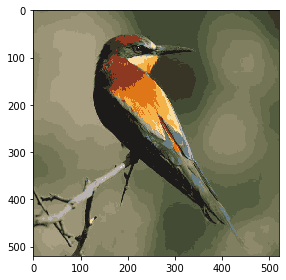

In [187]:
image_compressed = io.imread('img_test_new16.png')
io.imshow(image_compressed)
io.show()

In [188]:
info = os.stat('img_test.png')
print("size before compressed: ",info.st_size/1024,"KB")
info = os.stat('img_test_new16.png')
print("size after compressed K=16: ",info.st_size/1024,"KB")
'''
info = os.stat('img_test_new8.png')
print("size after compressed K=8: ",info.st_size/1024,"KB")
info = os.stat('img_test_new16.png')
print("size after compressed K=16: ",info.st_size/1024,"KB")
info = os.stat('img_test_new24.png')
print("size after compressed K=24: ",info.st_size/1024,"KB")
'''

size before compressed:  187.5205078125 KB
size after compressed K=16:  45.744140625 KB


'\ninfo = os.stat(\'img_test_new8.png\')\nprint("size after compressed K=8: ",info.st_size/1024,"KB")\ninfo = os.stat(\'img_test_new16.png\')\nprint("size after compressed K=16: ",info.st_size/1024,"KB")\ninfo = os.stat(\'img_test_new24.png\')\nprint("size after compressed K=24: ",info.st_size/1024,"KB")\n'

# 3 Use AIC and BIC to choose K for Gaussian Mixture Models

In [189]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer().data

In [190]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [191]:
from sklearn.mixture import GaussianMixture

In [192]:
# GMM 
gm = GaussianMixture(n_components=12, random_state=0).fit(data)
LL=gm.score_samples(data)

In [193]:
def aic_bic_sk(K,data):
    aic=[]
    bic=[]
    for k in range(1,K):
        gm = GaussianMixture(n_components=k, random_state=0).fit(data)
        x=gm.aic(data)
        x2=gm.bic(data)
        aic.append(x)
        bic.append(x2)
    return aic,bic
        

In [6]:
aic,bic=aic_bic_sk(80,data)
x=range(79)

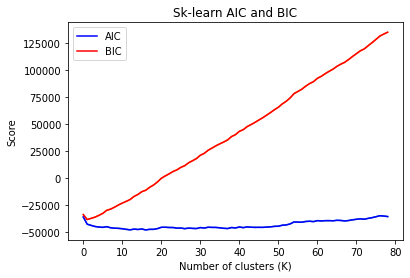

In [19]:
pyplot.plot(x,aic)
pyplot.plot(x,bic)
pyplot.title('Sk-learn AIC and BIC')
pyplot.xlabel('Number of clusters (K)')
pyplot.ylabel('Score')
pyplot.plot(aic, 'b-', label="AIC")
pyplot.plot(bic, 'r-', label="BIC")
pyplot.legend()
pyplot.show()


In [138]:
def aic_bic(K,data):
    aic=[]
    bic=[]
    for k in range(1,K):
        gm = GaussianMixture(n_components=k, random_state=0).fit(data)
        LL=gm.score(data)
        s,h=data.shape
        N=80
        
        x=np.amax(LL)
        
        # AIC 
        #return -2 * self.score(X) * X.shape[0] + 2 * self._n_parameters(X)
        #-2*x*s+2*x._n_
        a = -2*x+2*k # fel 
        
        # BIC
        # return (-2 * self.score(X) * X.shape[0] + self._n_parameters(X) * np.log(X.shape[0]))
        #b = -x+(1/2)*k*np.log(N)
        b = -2*x+k*np.log(N)

        bic.append(b*s)
        aic.append(a*s)
    return aic, bic 

In [139]:
print(data.shape)

(569, 30)


In [140]:
kk = 80
aic2, bic2 = aic_bic(kk,data)

In [141]:
print(aic2)

[-35608.721110287785, -42159.263253471625, -43104.27345106732, -43980.47439682536, -44322.32084859934, -44489.10521942949, -43694.61645708886, -44567.278048143744, -44819.06043807789, -44820.07072181042, -45023.104435587185, -45451.677635132706, -45750.366682668035, -44932.44434922955, -45138.03837369291, -44534.074129001776, -45244.5687636567, -44561.64281831485, -44427.66458105717, -43618.27717975862, -42243.789405773074, -42053.23830715164, -42132.5733195059, -42003.1741338303, -42452.85899185398, -42190.033624337084, -42632.504287649936, -41965.73199903048, -42069.95034343988, -42085.3768930712, -41037.7278134702, -41317.23882057448, -40429.8764804338, -40436.8336684035, -40316.04152622608, -40531.357029332736, -40837.09732869736, -40916.329197798936, -39825.46294439412, -40080.83424837654, -39032.633800706935, -39485.37640727747, -38661.777203065045, -38834.61418947643, -38802.95348152751, -38624.93269023435, -38509.32325508815, -38114.64173591301, -37730.704327783744, -37136.6188

In [142]:
print(bic2)

[-34253.34795515835, -39448.516943212744, -39038.153985679, -38558.98177630761, -37545.45507295215, -36356.86628865286, -34207.00437118279, -33724.292807108235, -32620.702041912948, -31266.339170516036, -30113.999729163363, -29187.199773579447, -28130.515665985335, -25957.22017741741, -24807.44104675133, -22848.103646930762, -22203.225126456255, -20164.92602598497, -18675.574633597837, -16510.81407716985, -13780.953148054872, -12235.02889430399, -10958.990751528816, -9474.218410723784, -8568.530113618022, -6950.331590971689, -6037.429099155094, -4015.283655406207, -2764.1288446861663, -1424.18223918805, 978.8399955423928, 2054.702143567547, 4297.437638837663, 5645.853605997397, 7122.018903304257, 8262.076555327041, 9311.70941109187, 10587.850697119728, 13034.09010565398, 14134.091956800998, 16537.66555960004, 17440.29610815894, 19619.268467500802, 20801.804636218872, 22188.83849929722, 23722.23244571982, 25193.215035995454, 26943.26971030004, 28682.58027355874, 30632.038882541816, 3224

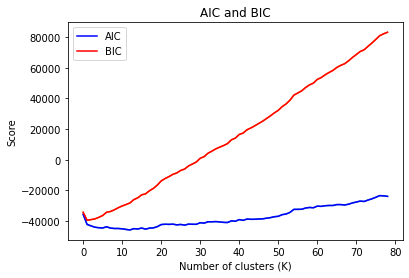

In [143]:
pyplot.plot(x,aic2)
pyplot.plot(x,bic2)
pyplot.title('AIC and BIC')
pyplot.xlabel('Number of clusters (K)')
pyplot.ylabel('Score')
pyplot.plot(aic2, 'b-', label="AIC")
pyplot.plot(bic2, 'r-', label="BIC")
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

def compute_bic(kmeans,X):
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)
